In [2]:
#Lets take a look at our directory
import os,shutil
print(os.listdir("../Python Lab/input"))

['sampleSubmission.csv', 'test1', 'train']


In [3]:
#the train data contains 25,000 images of both dogs and cats. We are going to sample a small portion of the data for
#training because of memory and Ram limits on kernels.
#So therefore, we will use Data Augmentation to reduce overfitting.
import random
import gc ##Gabage collector for cleaning deleted data from memory
train_dir = '../Python Lab/input/train'
test_dir = '../Python Lab/input/test1'
# train_imgs = ['../input/train/{}'.format(i) for i in os.listdir(train_dir)]  #get full data set
train_dogs = ['../Python Lab/input/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] # get dog images
train_cats = ['../Python Lab/input/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i] # get cat images
test_imgs = ['../Python Lab/input/test1/{}'.format(i) for i in os.listdir(test_dir)] # get test images
train_imgs = train_dogs[:2000] + train_cats[:2000] # slice the dataset and use 2000 in each class
random.shuffle(train_imgs) # shuffle it randomly
# clear the list that are useless
del train_dogs
del train_cats
gc.collect() # collect garabage to save memory

0

In [4]:
train_imgs

['../Python Lab/input/train/dog.1013.jpg',
 '../Python Lab/input/train/dog.11774.jpg',
 '../Python Lab/input/train/cat.10288.jpg',
 '../Python Lab/input/train/dog.11528.jpg',
 '../Python Lab/input/train/dog.10375.jpg',
 '../Python Lab/input/train/cat.11001.jpg',
 '../Python Lab/input/train/cat.10170.jpg',
 '../Python Lab/input/train/cat.11545.jpg',
 '../Python Lab/input/train/dog.10367.jpg',
 '../Python Lab/input/train/dog.10301.jpg',
 '../Python Lab/input/train/dog.11372.jpg',
 '../Python Lab/input/train/cat.10530.jpg',
 '../Python Lab/input/train/cat.11170.jpg',
 '../Python Lab/input/train/cat.1073.jpg',
 '../Python Lab/input/train/dog.10238.jpg',
 '../Python Lab/input/train/cat.10065.jpg',
 '../Python Lab/input/train/cat.10382.jpg',
 '../Python Lab/input/train/dog.11041.jpg',
 '../Python Lab/input/train/dog.10923.jpg',
 '../Python Lab/input/train/dog.10248.jpg',
 '../Python Lab/input/train/cat.10992.jpg',
 '../Python Lab/input/train/cat.10158.jpg',
 '../Python Lab/input/train/cat.11

In [4]:
# import some packages to use
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install opencv-python

In [5]:
#Lets declare our image dimensions
#we are using coloured images. 
nrows = 150
ncolumns = 150
channels = 3 # change to 1 if you want use grayscale image

#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Retruns two arrays:
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y =[] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC)) # Read an image
        # get the labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
       
    return X,y

In [6]:
    # get the train and test data
    X, y = read_and_process_image(train_imgs)

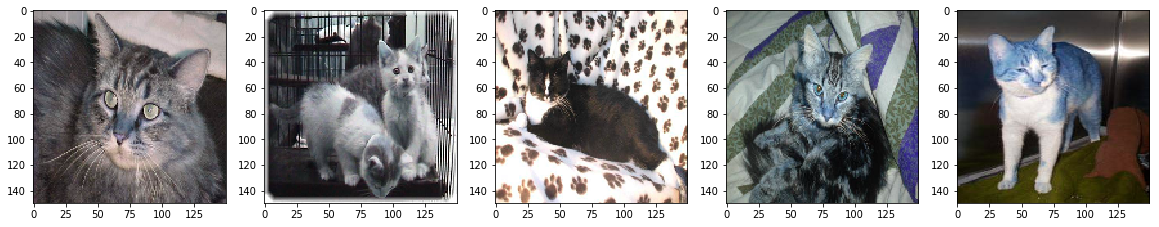

In [7]:
# Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns +1 ,columns, i+1)
    plt.imshow(X[i])

Text(0.5,1,'Labels for Cats and Dogs')

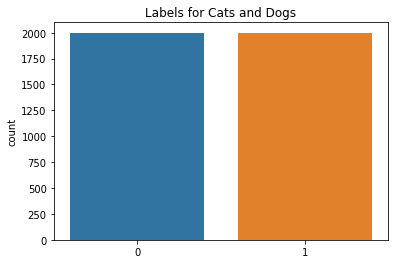

In [8]:
del train_imgs
gc.collect()
# Convert list to numpy array
X = np.array(X)
y = np.array(y)
# lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Cats and Dogs')


In [9]:
print('Shape of trian image:', X.shape)
print('Shape of labels is :', y.shape)

Shape of trian image: (4000, 150, 150, 3)
Shape of labels is : (4000,)


In [10]:
# Lets split the data into trin and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state =2)

In [11]:
# Clear memory
del X
del y
gc.collect()

# get the length of train and validation data
ntrain = len(X_train)
nval = len(X_val)
#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32  

In [12]:
from keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))

C:\Users\prash\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
conv_base.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

batch_normalization_123 (BatchN (None, 7, 7, 160)    480         conv2d_123[0][0]                 
__________________________________________________________________________________________________
activation_123 (Activation)     (None, 7, 7, 160)    0           batch_normalization_123[0][0]    
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 7, 7, 192)    208896      block17_11_ac[0][0]              
__________________________________________________________________________________________________
conv2d_124 (Conv2D)             (None, 7, 7, 192)    215040      activation_123[0][0]             
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 7, 7, 192)    576         conv2d_121[0][0]                 
__________________________________________________________________________________________________
batch_norm

In [14]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid')) #Sigmoid function at the end because we have just two classes

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [16]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv base: 492
Number of trainable weights after freezing the conv base: 4


In [17]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),metrics=['accuracy'])

In [18]:
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(rescale = 1./255, # Scale the image between 0 and 1
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale = 1./255)  #We do not augment validation data. we only perform rescale

In [19]:
# Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val,y_val, batch_size=batch_size)

In [20]:
# The training part
#We train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain // batch_size,
                             epochs = 3,
                             validation_data = val_generator,
                             validation_steps = nval // batch_size)

Epoch 1/3
100/100 [==============================] - 134s 1s/step - loss: 0.5069 - acc: 0.7366 - val_loss: 0.2566 - val_acc: 0.9413
Epoch 2/3
100/100 [==============================] - 107s 1s/step - loss: 0.4082 - acc: 0.8209 - val_loss: 0.3608 - val_acc: 0.9387
Epoch 3/3
100/100 [==============================] - 126s 1s/step - loss: 0.3911 - acc: 0.8150 - val_loss: 0.2994 - val_acc: 0.9475


In [21]:
#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

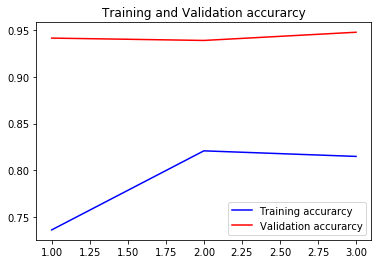

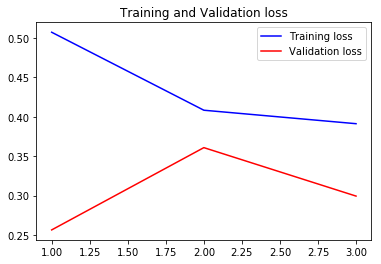

In [22]:
#lets plot the train and val curve
import matplotlib.pyplot as plt

#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [23]:
def smooth_plot(points, factor=0.7):
    smooth_pts = []
    for point in points:
        if smooth_pts:
            previous = smooth_pts[-1]
            smooth_pts.append(previous * factor + point * (1 - factor))
        else:
            smooth_pts.append(point)
    return smooth_pts

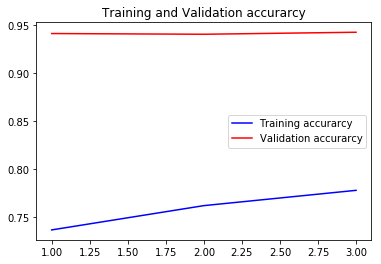

In [24]:
#Plot figure
plt.plot(epochs, smooth_plot(acc), 'b', label='Training accurarcy')
plt.plot(epochs, smooth_plot(val_acc), 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()

In [25]:
#Now lets predict on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

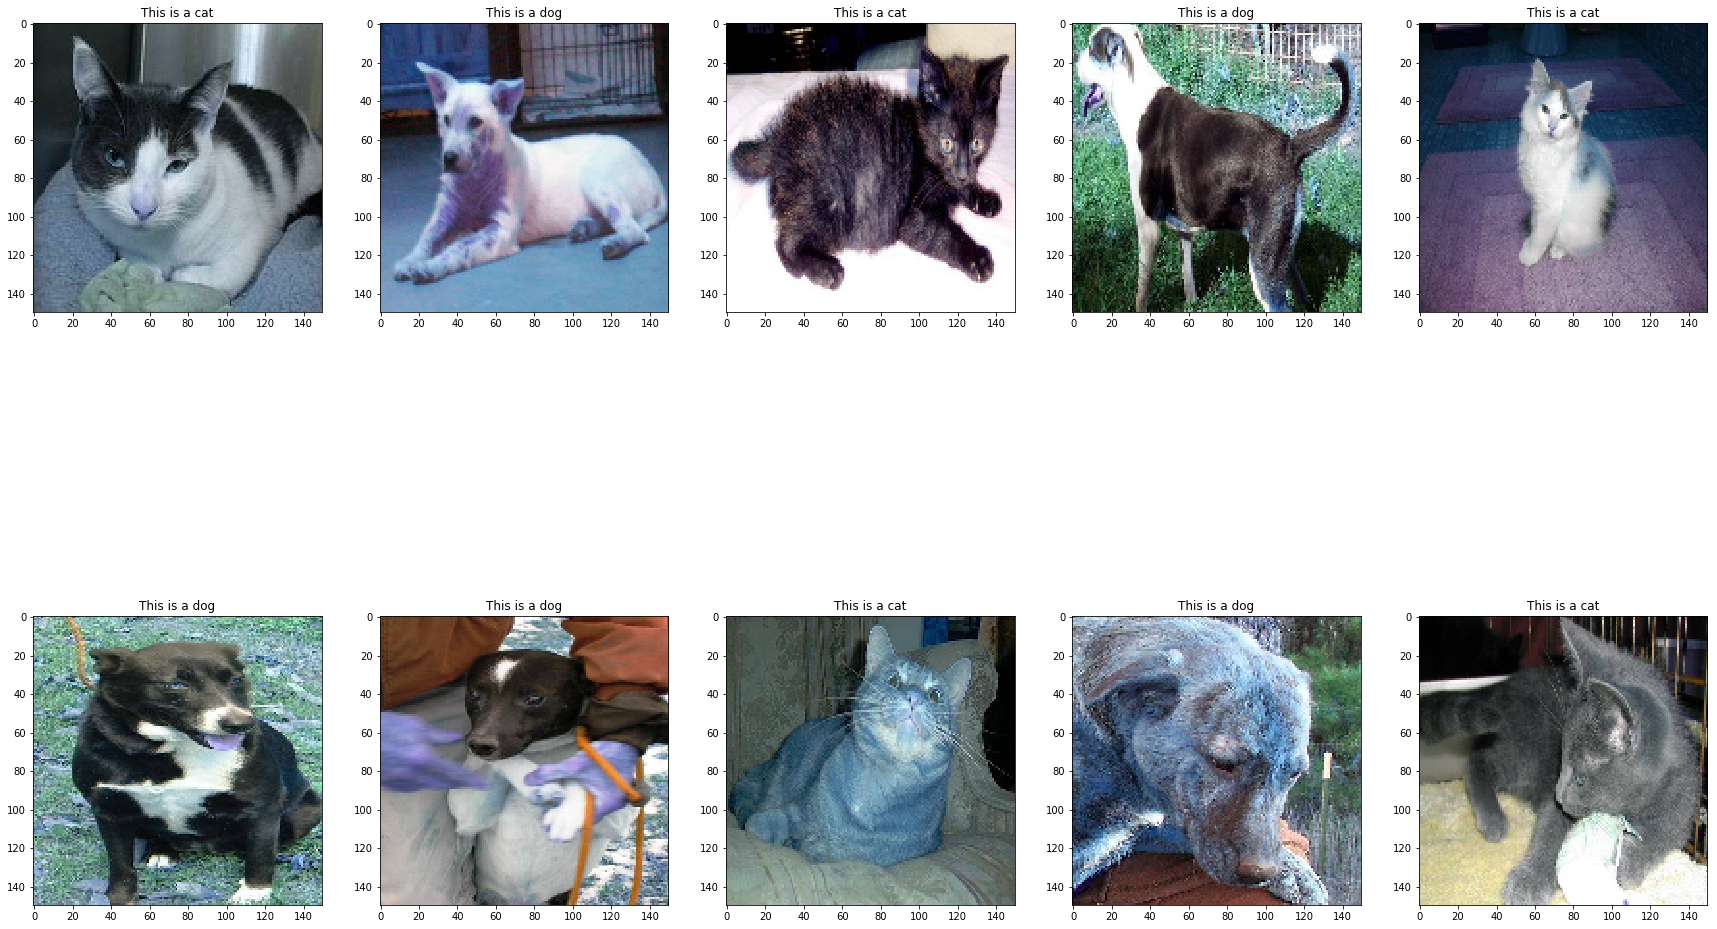

In [26]:
i = 0
columns = 5
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()